# Two Agent Copilot

### Load the required libraries

In [1]:
import os
import sales_agent
import trading_agent
from pathlib import Path

from dotenv import load_dotenv
from openai import AzureOpenAI
from openai.types import FileObject


### Load the environment variables

In [3]:
load_dotenv()
api_endpoint = os.getenv("OPENAI_URI")
api_key = os.getenv("OPENAI_KEY")
api_version = os.getenv("OPENAI_VERSION")
api_deployment_name = os.getenv("OPENAI_GPT_DEPLOYMENT")
email_URI = os.getenv("EMAIL_URI")

In [4]:
client = AzureOpenAI(api_key=api_key,
        api_version=api_version,
        azure_endpoint=api_endpoint)

### Create the AzureOpenAI clients

In [5]:
trading_agent = trading_agent.get_agent()

In [6]:
sales_agent = sales_agent.get_agent()

data/sales/sellers.csv
data/sales/customers.csv
data/sales/orders.csv
data/sales/inventory.csv


In [7]:
def semantic_intent(prompt:str)->str:
    prompt_template = """system:
You are an agent that can determine intent from the following list of intents and return the intent that best matches the user's question.
 
List of intents:
SalesAgent: questions or operations related to calculations, customers, sales, orders, inventory, items, and sellers.
TradingAgent: questions or operations related to trading, stocks, investments, and financial markets.
OtherAgent: any other question

user:
<QUESTION>

Output in ONE word."""


    full_prompt = prompt_template.replace("<QUESTION>", prompt)
    completion = client.chat.completions.create(
            model=api_deployment_name,
            messages=[
                {
                    "role": "user",
                    "content": full_prompt,
                },
            ],
            max_tokens=2,
            temperature=0.1           
        )    
    try:
        return completion.choices[0].message.content
    except:
        return "Unknown"
    

### Go to load balance endpoint or to the Assistant based on intent

In [13]:
def process_for_intent(user: str, user_id: str, prompt: str):
    intent = semantic_intent(prompt)
    print(f"Intent: {intent}")
    
    if intent=="SalesAgent":
        sales_agent.process_prompt(user, user_id, prompt)
    elif intent=="TradingAgent":
        trading_agent.process_prompt(user, user_id, prompt)
    elif intent=="OtherAgent":
        completion = client.chat.completions.create(
            model=api_deployment_name,
            messages=[
                {
                    "role": "user",
                    "content": prompt,
                }
            ]
        )
        print(completion.choices[0].message.content)
    else:        
        print("Unknown Intent")

### Have a conversation with the Assistant

In [11]:
process_for_intent("Suzan", "user_123", "What is the speed of light?")

Intent: OtherAgent
The speed of light in a vacuum is exactly 299,792,458 meters per second (approximately 186,282 miles per second). This constant speed is considered a fundamental constant of nature and is denoted by the letter 'c'. It is the maximum speed at which all conventional matter and information in the universe can travel. The precise value of the speed of light has been determined by international agreement through the definition of the meter in terms of the speed of light.


Intent: SalesAgent
processing ...
user: John:
Chart the products sold by State?

assistant:
To chart the products sold by state, I will first need to review the contents of the uploaded files to identify the relevant data that contains information about the states and products sold. I will examine the files and then proceed with creating the chart. Please bear with me for a moment while I check the files.

assistant:
We have successfully loaded the content of four files. To chart the products sold by state, it appears that we need to combine information from these dataframes. We may need to join the Order data (which contains `ItemID` and `CustomerID`) with Customer data (which holds the `State`) and then relate that information to the Item description. 

Let me proceed with combining this data appropriately to generate the desired chart.

assistant:
We have aggregated the data, and now we have the total quantities of products sold by state. Next, I'll create a chart to visualize this 

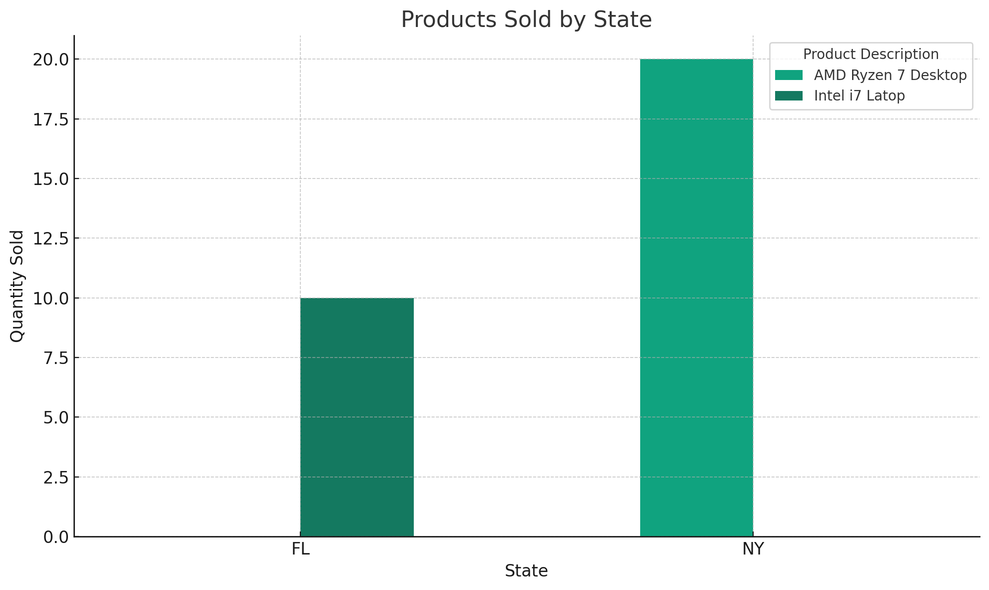

assistant:
The chart displaying the products sold by state has been created. You can download the chart image using the following link:

[Download Products Sold by State Chart](sandbox:/mnt/data/products_sold_by_state_chart.png)

Do you have any further questions or need additional assistance, Jane Doe?

Annotation Content:
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x07\xd0\x00\x00\x04\xb0\x08\x06\x00\x00\x00\xa3$\xd1\xbe\x00\x00\x009tEXtSoftware\x00Matplotlib version3.4.3, https://matplotlib.org/\xcc\x9eD\xcf\x00\x00\x00\tpHYs\x00\x00\x1e\xc2\x00\x00\x1e\xc2\x01n\xd0u>\x00\x01\x00\x00IDATx\x9c\xec\xddgxT\xd5\xfa\xf7\xf1_z\x02i\xf4N\x90b\xe8`@A\x90\xa6\xa0 \tE\x026<""E\x91#`=*"G\xb1\x81\x05EA\x14\xa4s\xe8\x12zG:\x84\xde;\x01\x82\tI \xbd\x90\xf6\xbc\xc8\x93\xfd\xcf$3i$L\x90\xef\xe7\xba\xbc\xce\xec=k\xafu\xef\x99=\x933\xdc{\xdd\xcb&===]\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xdc\xe7l\xad\x1d\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00%\x01\tt\x00\x00\x00\x00\x00\x00\x00\x00\x

In [14]:
process_for_intent("John", "user_123", "Chart the products sold by State?")

In [15]:
process_for_intent("John", "user_123", "What is the current MSFT price?")

Intent: TradingAgent
processing ...
Function Calling
{'tool_calls': [{'id': 'call_ZvQ6u8X8SiLaUf0iJrFHPJqB', 'function': {'arguments': '{"symbol":"MSFT"}', 'name': 'get_stock_price'}, 'type': 'function'}]}
Submitting outputs back to the Assistant...
user: John:
What is the current MSFT price?

assistant:
The current price of Microsoft Corporation (MSFT) stock is $410.34. If you have any further questions, please let me know.

Deleted thread:  thread_b7uzyOID7PzT36ZeUp4BIdle


### Cleanup

In [ ]:
sales_agent.cleanup()
trading_agent.cleanup()